# Lab: Build Neural Networks via Pytorch

The purpose of this assignment is to learn how to build neural networks using PyTorch, focusing on both the theoretical and practical aspects of the process.

One key step involves passing the output of a regression model through the Sigmoid function. This operation transforms the raw output (often called the logit) into a probability value between 0 and 1, which represents the likelihood of an observation belonging to the positive class. 

This step is particularly important in binary classification tasks, as it allows us to interpret the model's predictions in probabilistic terms and enables subsequent evaluation using metrics such as accuracy or binary cross-entropy loss.

## Imports
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchsummary import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Neural Network Classification
<hr>

### 1. Binary Classification

We will build a binary classification model using PyTorch. The output of the regression model will be passed through the Sigmoid function to convert it into a value between 0 and 1, representing the probability that an observation belongs to the positive class.

#### PyTorch Tensor

Please convert your input data, X (features) and y (labels), into PyTorch tensors so they can be used with PyTorch models.

X_t and y_t are created as tensors with the data type torch.float32, which is required for most machine learning tasks in PyTorch.

In [3]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)


# Your code for tensor
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)


#### TensorDataset
Use PyTorch's TensorDataset and DataLoader to prepare the dataset for training, including batching and shuffling.

Requirements:

Combine X_t and y_t into a dataset using TensorDataset.

Use DataLoader to create batches of data for training. The batch size should be specified by the variable 45.
Enable shuffle=True in the DataLoader to randomize the order of data for each epoch.

In [6]:
# Create dataloader
# Your code for TensorDataset and dataloader
batchSize = 45
# Create a TensorDataset combining features and labels
dataset = TensorDataset(X_t, y_t)


dataloader = DataLoader(dataset, batch_size=batchSize, shuffle=True)

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Data points with y = 0 should be marked in blue, and those with y = 1 should be marked in red.
- Both the x-axis and y-axis labels should have a font size of 14.

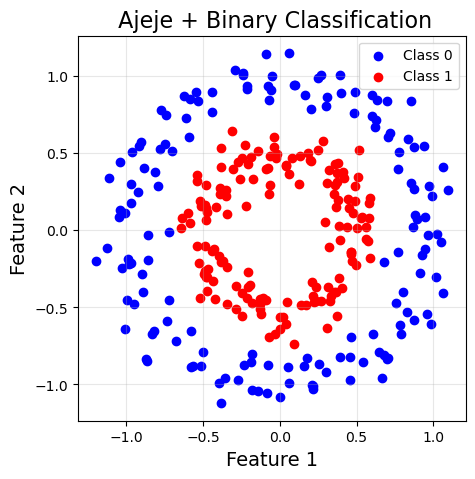

In [14]:
# Plot each class
# Code plot with scatter

# 5x5
plt.figure(figsize=(5, 5))

# Add Label and title
plt.title(" Ajeje + Binary Classification", fontsize=16)

# Plot points with y=0 in blue
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0')
# Plot points with y=1 in red
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Class 1')

# Set axis labels with font size 14
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



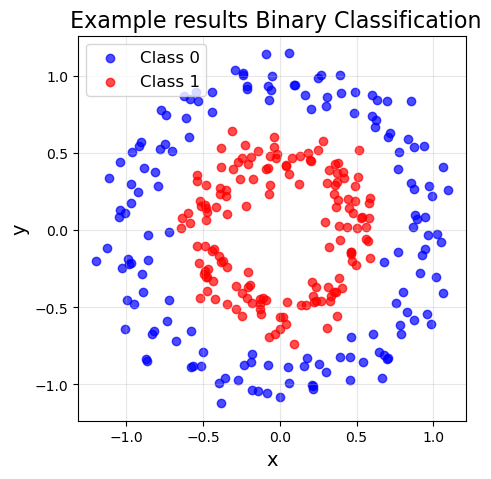

In [4]:
# Plot each class
# Example results

We're going to start using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

#### Create Neural Network 

Implement a neural network class for binary classification using PyTorch's nn.Module.

- Create a fully connected layer that maps the input features to the hidden layer.
- Use Relu as activation
- Create another fully connected layer
- Use Sigmoid


In [18]:

class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            # First fully connected layer mapping input to hidden layer
            nn.Linear(input_size, hidden_size),
            # ReLU activation
            nn.ReLU(),
            # Second fully connected layer mapping hidden to output
            nn.Linear(hidden_size, output_size),
            # Sigmoid activation for binary classification
            nn.Sigmoid() 
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Build trainer

Implement a simple training wrapper for a PyTorch network that handles the forward pass, backpropagation, and parameter updates for multiple epochs.

Training Process:

Epoch Loop: 
- Iterate over the specified number of epochs.

Batch Loop:
- Iterate over batches of X and y from the dataloader.
- Clear the gradients using optimizer.zero_grad().
- Perform a forward pass:
- Use the model to compute predictions (y_hat).
- Flatten the output to match the expected shape if necessary.
- Calculate the loss using criterion(y_hat, y).
- Perform backpropagation with loss to compute gradients.
- Update model parameters using optimizer.step().
- Accumulate the loss for the batch into a running total.

Logging:
- At the end of each epoch, compute and print the average loss over all batches if verbose is True.

In [45]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    train_loss = []  # List to store loss values
    
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            optimizer.zero_grad()        # Clear gradients
            y_hat = model(X).flatten()   # Forward pass
            loss = criterion(y_hat, y)   # Calculate loss
            loss.backward()              # Backpropagation
            optimizer.step()             # Update parameters
            losses += loss.item()        # Add batch loss to running total
        
        avg_loss = losses / len(dataloader)
        train_loss.append(avg_loss)      # Store the average loss for this epoch
        
        if verbose: print(f"epoch: {epoch + 1}, loss: {avg_loss:.4f}")
    
    return train_loss  # Return the loss history

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

Let's train the model:

In [49]:
# set your mode with 2 input layers, 6 hidden layers, and 1 output layers via binaryClassifier class
model = binaryClassifier(input_size=2, hidden_size=6, output_size=1)

#### Activation functions

We're going to using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [52]:
LEARNING_RATE = 0.1
criterion = torch.nn.BCELoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm

In [54]:
# build your trainer funtion with model, criterion, optimizer, dataloader, epochs=30, verbose=True
# Your code
train_loss = trainer(model, criterion, optimizer, dataloader, epochs=30, verbose=True)

epoch: 1, loss: 0.6891
epoch: 2, loss: 0.6534
epoch: 3, loss: 0.5561
epoch: 4, loss: 0.4594
epoch: 5, loss: 0.3324
epoch: 6, loss: 0.2186
epoch: 7, loss: 0.1401
epoch: 8, loss: 0.0940
epoch: 9, loss: 0.0768
epoch: 10, loss: 0.0532
epoch: 11, loss: 0.0527
epoch: 12, loss: 0.0397
epoch: 13, loss: 0.0342
epoch: 14, loss: 0.0295
epoch: 15, loss: 0.0285
epoch: 16, loss: 0.0271
epoch: 17, loss: 0.0239
epoch: 18, loss: 0.0220
epoch: 19, loss: 0.0197
epoch: 20, loss: 0.0186
epoch: 21, loss: 0.0180
epoch: 22, loss: 0.0175
epoch: 23, loss: 0.0160
epoch: 24, loss: 0.0148
epoch: 25, loss: 0.0137
epoch: 26, loss: 0.0133
epoch: 27, loss: 0.0139
epoch: 28, loss: 0.0144
epoch: 29, loss: 0.0126
epoch: 30, loss: 0.0118


#### Visualize your results 

#### Part 1: Loss Curve

- Please plot the loss curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

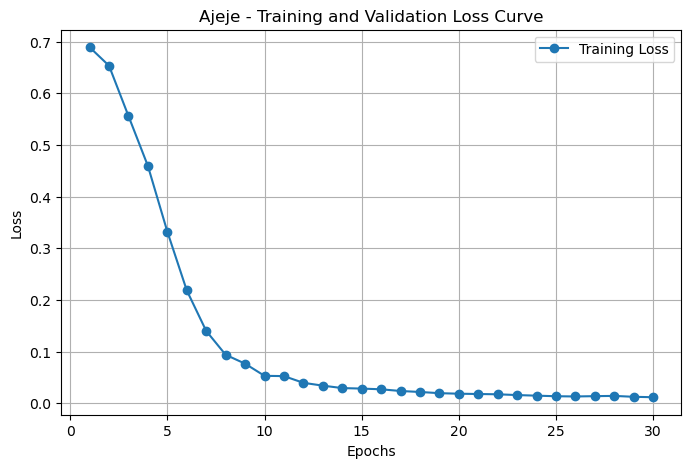

In [58]:
# Plot Training and Validation Loss Curve
plt.figure(figsize=(8, 5))  
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss", marker='o')  
plt.xlabel("Epochs")  
plt.ylabel("Loss")  
plt.title("Ajeje - Training and Validation Loss Curve")  
plt.legend()  
plt.grid(True)  
plt.show()

### Part 2: Actual and predicted data 

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

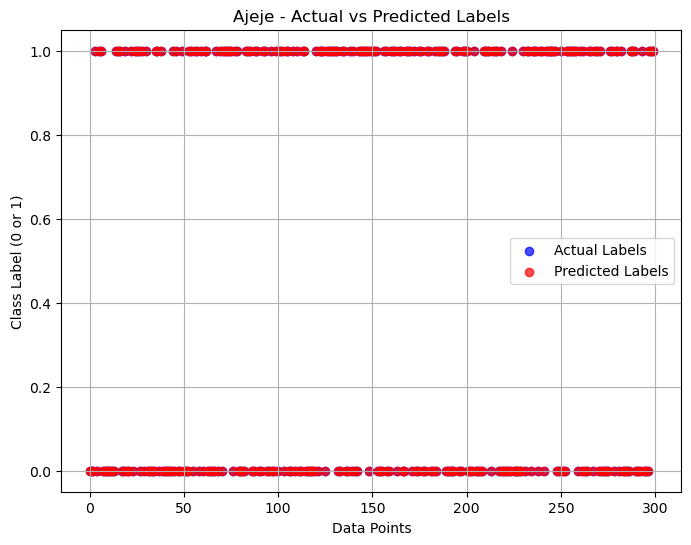

In [78]:
model.eval()  # Set the model to evaluation mode

predictions = []
probabilities = []
actual_labels = []  

with torch.no_grad():  
    for X, y in dataloader:
        y_hat = model(X).flatten()  
        # Don't apply sigmoid again if your model already has it
        predicted_class = (y_hat > 0.5).float()
        
        predictions.extend(predicted_class.numpy())  
        probabilities.extend(y_hat.numpy())  
        actual_labels.extend(y.numpy())  
        
predictions = np.array(predictions)
probabilities = np.array(probabilities)
actual_labels = np.array(actual_labels)

plt.figure(figsize=(8, 6))
plt.scatter(range(len(actual_labels)), actual_labels, color='blue', label="Actual Labels", alpha=0.7)
plt.scatter(range(len(predictions)), predictions, color='red', label="Predicted Labels", alpha=0.7)
plt.xlabel("Data Points")
plt.ylabel("Class Label (0 or 1)")
plt.title("Ajeje - Actual vs Predicted Labels")
plt.legend()
plt.grid(True)
plt.show()

To be clear, our model is just outputting some number between -1 and +1 (we are applying Sigmoid in the model), so:
- To get the probabilities we would need to pass them through a Sigmoid;
- To get classes, we can apply some threshold (usually 0.5) to this probability.

For example, we would expect the point (0,0) to have a high probability and the point (-1,-1) to have a low probability:

In [80]:
prediction = np.array(predictions)
print(prediction)

[0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.]


In [82]:
probability = np.array(probabilities)
print(probability)

[6.50210666e-07 7.50657591e-06 3.23840723e-05 9.99885321e-01
 9.79318065e-06 9.99985695e-01 9.29269850e-01 1.10427873e-05
 3.28318914e-03 1.97520349e-04 4.26060986e-04 1.32721020e-02
 7.73514668e-03 1.17911340e-03 9.99997258e-01 9.99269903e-01
 9.99938846e-01 1.18268828e-03 3.04939385e-05 9.91636276e-01
 2.02532956e-05 7.10017397e-04 8.80373657e-01 1.19883634e-05
 9.99947190e-01 9.99999166e-01 9.99976754e-01 8.02617446e-02
 9.87116754e-01 1.09596609e-03 9.89601672e-01 3.02966619e-05
 5.88072464e-02 2.56184046e-03 1.84492429e-03 9.99931574e-01
 9.99421239e-01 2.20480468e-03 9.99802053e-01 5.53934988e-05
 4.36859002e-04 5.48707976e-05 8.07483448e-05 2.23743473e-03
 9.16114569e-01 4.65449290e-07 9.99911070e-01 2.64065294e-03
 2.15635396e-06 9.96792853e-01 5.89057336e-08 4.20574042e-06
 9.07247610e-09 9.99056995e-01 9.99999166e-01 9.44409658e-06
 9.99804556e-01 9.99975562e-01 2.19429538e-07 9.99253571e-01
 3.61436687e-04 9.99147296e-01 9.92681086e-01 5.14417698e-05
 1.48421532e-04 3.536130

In [84]:
classes = np.where(probability > 0.5, 1, 0)
print(classes)

[0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1
 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1
 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0
 0 1 1 1]


### 2. Multiclass Classification

For multiclass classification, we'll need the softmax function:

$$\sigma(\vec{z})_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$$

It basically outputs probabilities for each class we wish to predict, and they all sum to 1. 

`torch.nn.CrossEntropyLoss` is a loss that combines a softmax with cross entropy loss. 

Let's try a 4-class classification problem using the following network:

In [86]:
X, y = make_blobs(n_samples=200, centers=4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
# Convert NumPy arrays to PyTorch tensors
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.long)  # Use long for multi-class classification

# Create dataset and dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [88]:
class multiClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Both the x-axis and y-axis labels should have a font size of 14.

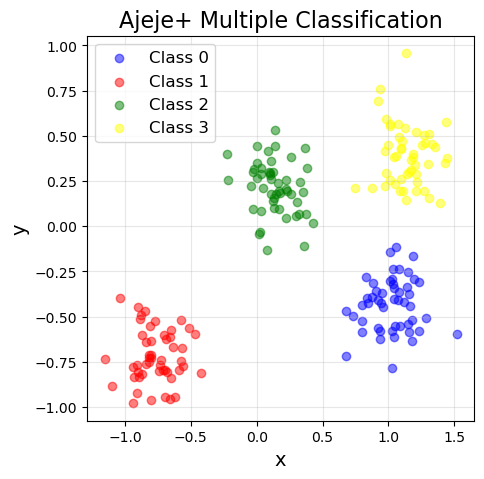

In [92]:
# Plot each class
# Your code plot with scatter

#5x5
plt.figure(figsize=(5, 5))

# Add Label and title
plt.title("Ajeje+ Multiple Classification", fontsize=16)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.5)

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', alpha=0.5)

plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='green', label='Class 2', alpha=0.5)

plt.scatter(X[y == 3][:, 0], X[y == 3][:, 1], color='yellow', label='Class 3', alpha=0.5)

plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Let's train this model:

In [98]:
# Define a multi-class classifier model
class multiClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
            # No sigmoid or softmax here for multi-class with CrossEntropyLoss
        )
    
    def forward(self, x):
        out = self.main(x)
        return out

# Create model with 2 input features, 6 hidden neurons, and 4 output classes
model_2 = multiClassifier(input_size=2, hidden_size=6, output_size=4)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss() # loss function with CrossEntropyLoss
optimizer = optim.Adam(model_2.parameters(), lr=0.2) # optimization algorithm - Adam lr=0.2

# Set up tracking for loss and accuracy
accuracies = []
losses = []

# Training loop with accuracy tracking
for epoch in range(10):
    epoch_loss = 0
    correct = 0
    total = 0
    
    for X_batch, y_batch in dataloader:
        # Forward pass
        optimizer.zero_grad()
        y_hat = model_2(X_batch)
        loss = criterion(y_hat, y_batch)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Track loss
        epoch_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(y_hat.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
    
    # Calculate epoch metrics
    epoch_loss = epoch_loss / len(dataloader)
    epoch_accuracy = 100 * correct / total
    
    # Store metrics
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)
    
    print(f"Epoch: {epoch + 1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

Epoch: 1, Loss: 0.6648, Accuracy: 77.50%
Epoch: 2, Loss: 0.0764, Accuracy: 99.00%
Epoch: 3, Loss: 0.0358, Accuracy: 98.50%
Epoch: 4, Loss: 0.0451, Accuracy: 97.50%
Epoch: 5, Loss: 0.0138, Accuracy: 99.50%
Epoch: 6, Loss: 0.0130, Accuracy: 99.50%
Epoch: 7, Loss: 0.0019, Accuracy: 100.00%
Epoch: 8, Loss: 0.0024, Accuracy: 100.00%
Epoch: 9, Loss: 0.0021, Accuracy: 100.00%
Epoch: 10, Loss: 0.0010, Accuracy: 100.00%


#### Visualize your results 

### Part 3: Accuracy Curve for 4 classes

- Please plot the Accuracy Curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

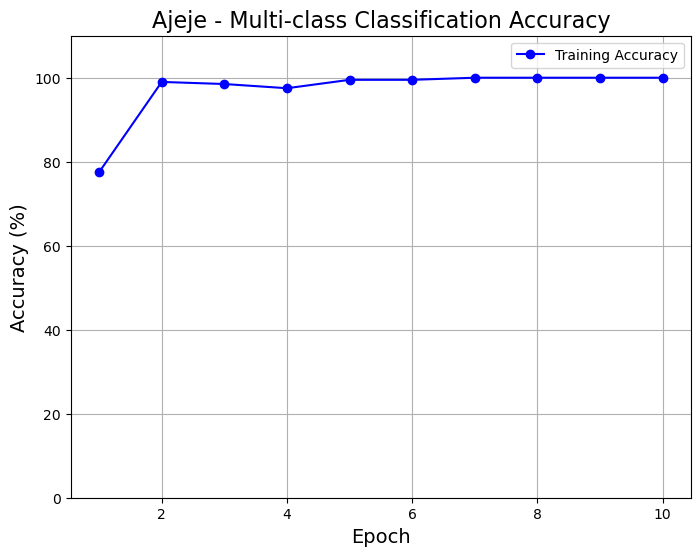

In [104]:
# Plot accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.title("Ajeje - Multi-class Classification Accuracy", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.grid(True)
plt.legend()
plt.ylim(0, 110)  # Set y-axis limits from 0 to over 100
plt.show()

### Part 4: Actual and predicted data for classes

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

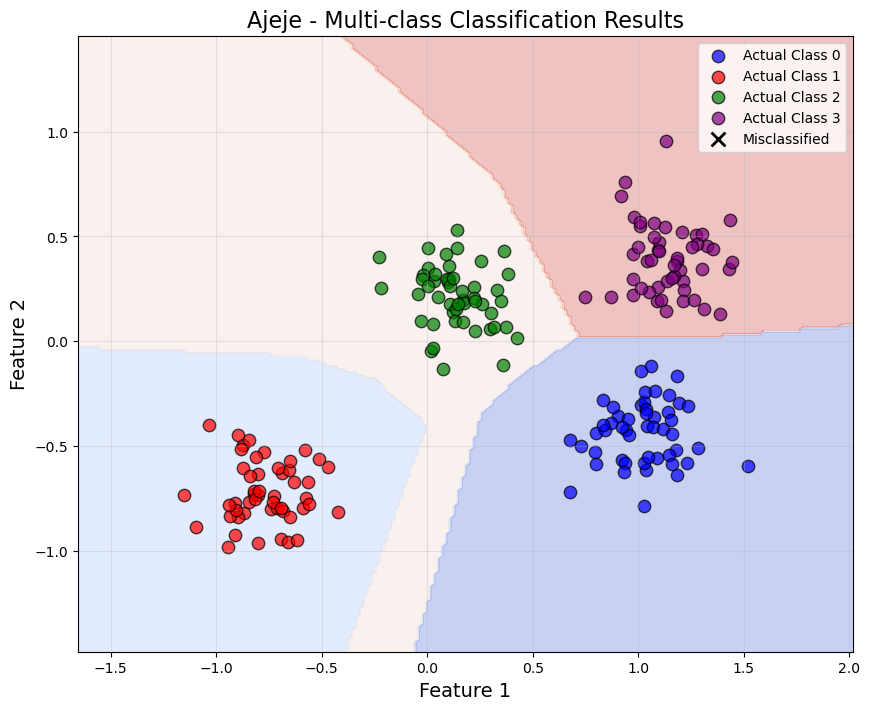

In [108]:
# Set model to evaluation mode
model_2.eval()

# Create a mesh grid to visualize decision boundaries
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Get model predictions for the entire grid
with torch.no_grad():
    grid_points = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    Z = model_2(grid_points)
    _, Z = torch.max(Z, 1)
    Z = Z.reshape(xx.shape)

# Get predictions for original data points
with torch.no_grad():
    outputs = model_2(X_t)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.numpy()

# Plot the decision boundaries and data points
plt.figure(figsize=(10, 8))

# Plot decision boundaries
plt.contourf(xx, yy, Z.numpy(), alpha=0.3, cmap='coolwarm')

# Plot the original data points
colors = ['blue', 'red', 'green', 'purple']
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

for i in range(4):
    # Plot actual data points
    plt.scatter(X[y==i, 0], X[y==i, 1], color=colors[i], 
                edgecolor='k', s=80, alpha=0.7, label=f'Actual {class_names[i]}')

# Mark misclassified points
misclassified = (predicted != y)
plt.scatter(X[misclassified, 0], X[misclassified, 1], 
            marker='x', s=100, color='black', linewidth=2, 
            label='Misclassified')

# Add labels and title
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.title('Ajeje - Multi-class Classification Results', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()